# Airbnb Paris Listing Analysis (2008 - 2021)
----
----

In [1]:
import numpy as np
import pandas as pd

In [2]:
listings = pd.read_csv("Listings.csv", encoding = "ISO-8859-1", low_memory = False)

In [3]:
listings

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [5]:
#converting 'host_since' coulmn datatype to date.
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [6]:
# filtering to only in "Paris" listings
paris_listings = listings[listings['city']== 'Paris']

In [7]:
paris_listings.head(5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [8]:
paris_listing = paris_listings[['city','host_since','neighbourhood','accommodates','price']]

In [9]:
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   city           64690 non-null  object        
 1   host_since     64657 non-null  datetime64[ns]
 2   neighbourhood  64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [10]:
# Finding missing values per columns
paris_listing.isna().sum()

city              0
host_since       33
neighbourhood     0
accommodates      0
price             0
dtype: int64

In [11]:
# Finding some insights
paris_listing.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [12]:
sum(paris_listing['accommodates']==0)

54

In [13]:
sum(paris_listing['price']==0)

62

In [14]:
paris_listing

,city,host_since,neighbourhood,accommodates,price
0,Paris,2011-12-03,Buttes-Montmartre,2,53
1,Paris,2013-11-29,Buttes-Montmartre,2,120
2,Paris,2014-07-31,Elysee,2,89
3,Paris,2013-12-17,Vaugirard,2,58
4,Paris,2014-12-14,Passy,2,60
...,...,...,...,...,...
279707,Paris,2015-04-13,Observatoire,2,120
279708,Paris,2013-11-27,Buttes-Montmartre,2,60
279709,Paris,2012-04-27,Buttes-Montmartre,2,50
279710,Paris,2015-07-16,Popincourt,2,105


## 2. Preparing Data for visualization
---

- Create a DataFrame called 'paris_listing_neighbourhood'. Group the Paris listings by neighbourhood and calculate the average price for each. Sort by 'price' in ascending order.

- Create a DataFrame called 'paris_listing_accomodations'. Filter your data down to the most expensive neighbourhood in Paris. Group it by 'accomodates' and calculate the average price for each. Sort by 'price' in order.

- Finally, create a DataFrame called 'paris_listing_over_time'. Group the data by the year component of 'host_since'. Calculate a count of rows to get the number of new hosts for each year, and the average price of listings for each year.


In [15]:
paris_listing['neighbourhood'].unique()

array(['Buttes-Montmartre', 'Elysee', 'Vaugirard', 'Passy', 'Temple',
       'Popincourt', 'Buttes-Chaumont', 'Opera', 'Gobelins',
       'Hotel-de-Ville', 'Pantheon', 'Enclos-St-Laurent',
       'Batignolles-Monceau', 'Luxembourg', 'Reuilly', 'Menilmontant',
       'Observatoire', 'Palais-Bourbon', 'Bourse', 'Louvre'], dtype=object)

In [16]:
paris_listing_neighbourhood = paris_listing.groupby('neighbourhood').agg({'price':'mean'}).sort_values('price')

In [17]:
paris_listing_neighbourhood.head(5)

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [18]:
paris_listing_neighbourhood.tail(5)

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [19]:
paris_listing_accommodates = paris_listing.query('neighbourhood == "Elysee"').groupby('accommodates').agg({'price': 'mean'}) .sort_values('price')                    

In [20]:
paris_listing_accommodates.head(5)

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [21]:
paris_listing_accommodates.tail(5)

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [22]:
paris_listing_over_time = paris_listing.set_index('host_since').resample('Y').agg({'neighbourhood':'count', 'price':'mean'})

In [23]:
paris_listing_over_time.head(5)

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


In [24]:
paris_listing_over_time.tail(5)

,neighbourhood,price
host_since,,
2017-12-31,4585,108.658888
2018-12-31,4294,138.209362
2019-12-31,5694,129.757113
2020-12-31,3412,141.456038
2021-12-31,133,93.488722


In [25]:
paris_listing_over_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2008-12-31 to 2021-12-31
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   neighbourhood  14 non-null     int64  
 1   price          14 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 336.0 bytes


## 3. Visualize the Data
---

- Build a horizontal bar chart of average rent price by neighborhood . Which neighborhood stand out?
- Build a horizontal bar chart of average price by accommodates in the most expensive . Are the results intuitive?
- Finally build the line charts of new hosts per year and average price per year. What happened to new hosts in 2015? Was average price impacted ?
- challenge : Plot both time series in a dual axis line chart!

In [26]:
    import seaborn as sns
    import matplotlib.pyplot as plt

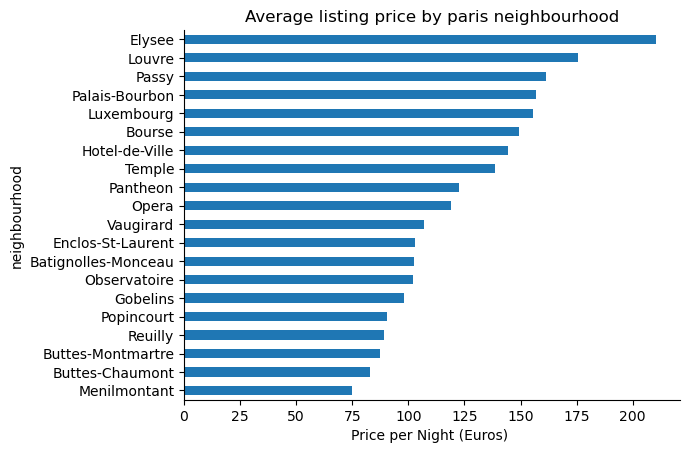

In [27]:
paris_listing_neighbourhood.plot.barh(title = 'Average listing price by paris neighbourhood',
                                    xlabel = 'Price per Night (Euros) ',
                                    ylabel = 'neighbourhood',
                                     legend = None)
sns.despine()

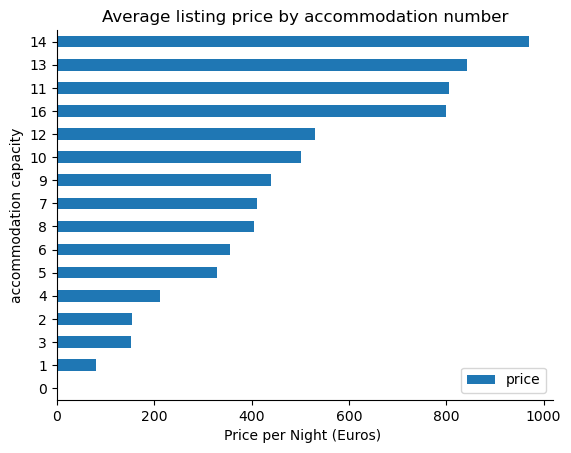

In [28]:
paris_listing_accommodates.plot.barh(title = 'Average listing price by accommodation number',
                                    xlabel = 'Price per Night (Euros) ',
                                    ylabel = 'accommodation capacity',
                                    )
sns.despine()

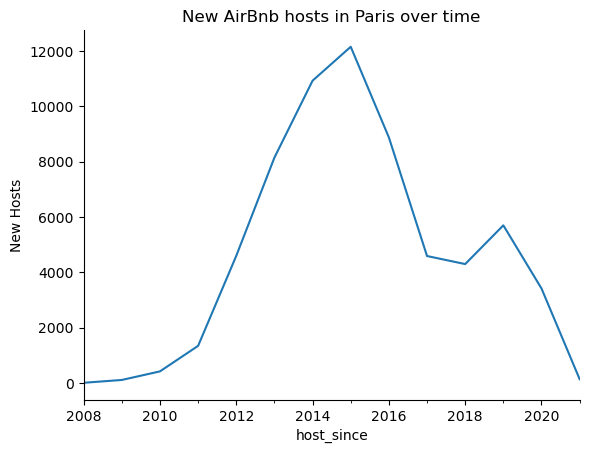

In [29]:
paris_listing_over_time['neighbourhood'].plot(title = 'New AirBnb hosts in Paris over time',
                                             ylabel = 'New Hosts')
sns. despine()

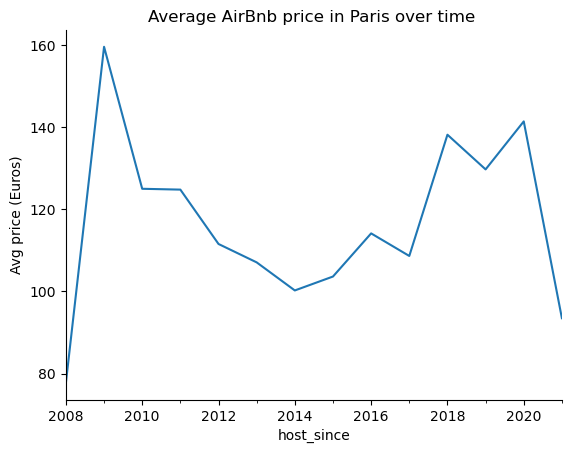

In [32]:
paris_listing_over_time['price'].plot(title = 'Average AirBnb price in Paris over time ',
                                             ylabel = 'Avg price (Euros)')
sns. despine()

In [33]:
# Creating dual axis chart from the last two above charts.
import matplotlib.pyplot as plt

Text(0.5, 1.0, '2015 regulation leads to fewer new hosts, higher price')

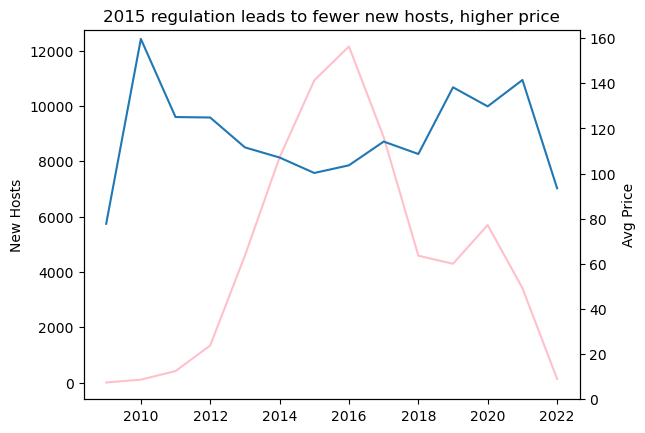

In [39]:
fig, ax = plt.subplots()
ax.plot(paris_listing_over_time.index,
       paris_listing_over_time['neighbourhood'],
       label = 'New Hosts',
       c = 'pink')
ax.set_ylabel('New Hosts')

ax2 = ax.twinx()
ax2.plot(paris_listing_over_time.index,
       paris_listing_over_time['price'],
       label = 'Avg Price')
ax2.set_ylim(0)
ax2.set_ylabel('Avg Price')

ax.set_title('2015 regulation leads to fewer new hosts, higher price')